# Цель проекта:
Необходимо выявить потенциально популярный продукт для рекламных кампаний на 2017 год. 
По данным  интернет-магазина «Стримчик» за предыдущие года о продажах игр, оценки пользователей и экспертов, жанры и платформы выявим закономерности, определяющие успешность игры.

Проект содержит следующие этапы:
- Обзор данных.
- Предобработка данных.
- Исследлвательский анализ.
- Проверка двух гипотез: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/datasets/games.csv')

## Подготовка данных
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [ ]:
display(data.head())

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Проверим, присутствуют ли в данных явные дубликаты

In [5]:
data.duplicated().sum()

0

Заменим названия столбцов на нижний регистр

In [6]:
print(data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [7]:
data.columns = data.columns.str.lower()

In [8]:
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Измменим тип данных в столбце year_of_release. Так как год не может быть дробным числом

In [9]:
data=data.dropna(subset=['year_of_release']) # пропушенных значений в годах очень мало, целесообразнее их удалить
data['year_of_release']=data['year_of_release'].astype('int')

Удалим строки с пропущенными значениями в столбцах name и genre так как количество пропусков слишком мало и не повлияет на результат исследования.

In [10]:
data=data.dropna(subset=['name', 'genre'])

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


В столбцах critic_score и user_score есть пропуски, которые необходимо заменить. Для этого выведем на экран эти два стобца для ознакомления.

In [12]:
display(data[['critic_score','user_score']].head(10))

,critic_score,user_score
0,76.0,8
1,NaN,NaN
2,82.0,8.3
3,80.0,8
4,NaN,NaN
5,NaN,NaN
6,89.0,8.5
7,58.0,6.6
8,87.0,8.4
9,NaN,NaN


Заменим пропущенные значения в стоблце critic_score и user_score на медианные значения относительно наименования игры.

In [13]:
print(data['critic_score'].value_counts())

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64


In [14]:
import warnings #импортируем библиотеку

warnings.filterwarnings('ignore') # отключаем предупреждения

In [15]:
data['critic_score']=data['critic_score'].fillna(-1) # поставим заглушку на пропуски в виде отрицательного значения

In [16]:
print(data['user_score'].value_counts())

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.6       2
0.5       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


Так как в столбце user_score присутствуют значения tbd, эти значения мы заменим на 0, в связи с тем, что оценка, по видимому, еще не подсчитана


TBD - To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. Естественно, оно может применяться и в других случаях, но данный вариант является самым распространенным.


In [17]:
data['user_score']=data['user_score'].replace('tbd', -2) # поставим заглушку на значения tbd

In [18]:
data['user_score']=data['user_score'].fillna(-1)

In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


In [20]:
data['user_score']=data['user_score'].astype(float)

В данных присутствует столбец rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. В данном столбце есть большое количество пропущенных значений. В связи с тем, что рейтинг устанавливается по неизвестным нам факторам, заполнять пропуски мы не будем.

In [21]:
data['sum_sales']=data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

### Промежуточный вывод по предобработке данных
На данном этапе были проведены следующие действия:
 - замена столбцов на нижний регистр;
 - заменены пропуски в столбце year_of_release на 0, так как в анализе эти строки участвовать не будут, но для общей картины оставить их можно;
 - удалены строки с пропусками в стоблцах name и genre. Заполнить пропуски не представляется возможным, а количество таких строк на столько мало, что никак не повляет на ход исследования;
 - заменены пропуски в стоблцах critic_score и user_score, в зависимости от названия игры. Так как одна и та же игра может быть выпущена на разных платформах;
 - в столбце user_score есть значения tbd, что означает что оценка еще не посчитана. Так как для дальнейшего анализа нужен числовой формат данного столбца, была произведена замена tbd на 0. Такая замена не повлияет на анализ, так как подобных значений не очень много.
 - создана дополнительная колонка с общей суммой продаж каждой игры во всех регионах

In [ ]:
display(data.head())

## Исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Посчитаем, сколько игр выпускалось в каждом году.

<AxesSubplot:xlabel='year_of_release'>

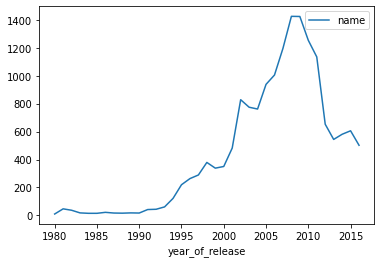

In [23]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot()

Рост выпуска игр наблюдается в период с 1990 года до 2010, затем начинается резкий спад. Примерно в 2013 году присутствует присутствует небольшой подъем выпуска, но после 2015 года он опять начинает снижаться. 

Так как целью проекта является прогнозирование продаж в 2017 году, нет необходимости анализировать все данные. Более целесообразным будет взять данные за 2016, 2015 и 2014 года. Так же эти показатели в дальнейшем можно будет сопоставить с данными финансовой отчетности, которая так же составляется за 3 года.

<AxesSubplot:xlabel='year_of_release'>

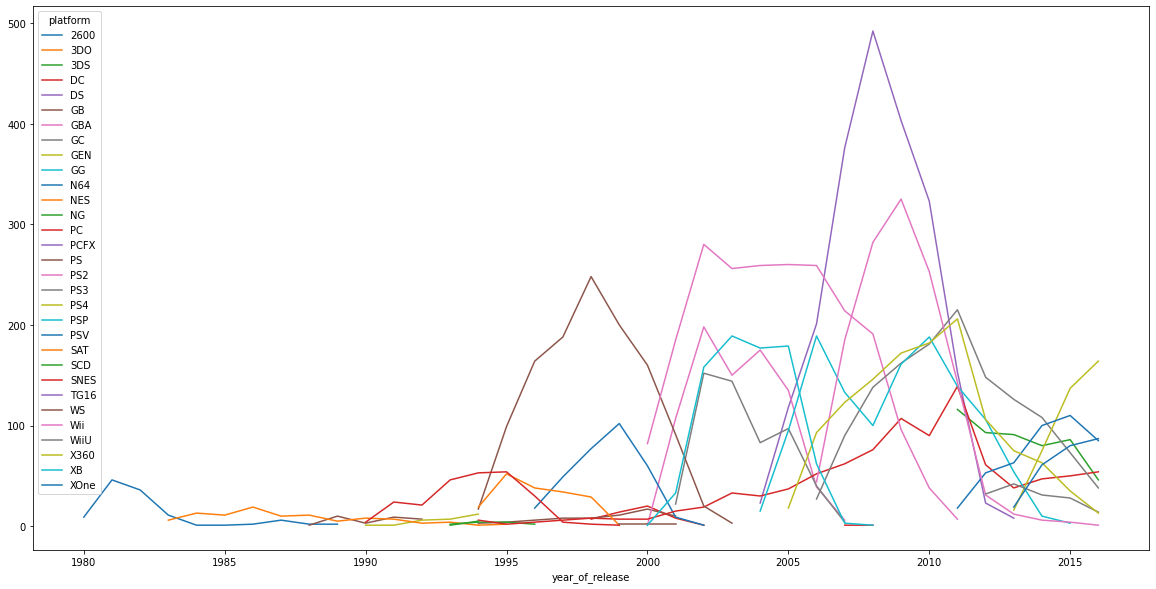

In [24]:
data.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count').plot(figsize=(20,10))

На данном графике видно, когда появляются и исчезают различные платформы. Например "долгожителем" можно смело назвать PC. Но в основном, из за большого количества платформ, трудно разобрать какой цвет принадлежит какой платформе. Для детального анализа лучше брать либо определенный отрезок времени, либо определенные платформы.

In [25]:
actual_years=data.query('year_of_release>=2014')

Посмотрим, как менялись продажи по платформам. Для этого составим сводную таблицу по каждой платформе и годам выпуска игры

In [26]:
platform=actual_years.pivot_table(index=['platform', 'year_of_release'], values='sum_sales', aggfunc='sum')
display(platform)

sum_sales
platform year_of_release           
3DS      2014                 43.76
         2015                 27.78
         2016                 15.14
PC       2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2014                100.00
         2015                118.90
         2016                 69.25
PSP      2014                  0.24
         2015                  0.12
PSV      2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2014                 54.07
         2015                 60.14
         2016                 26.15

In [27]:
(platform.groupby('platform').sum()
 .sort_values(by='sum_sales', ascending=False))

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


<AxesSubplot:xlabel='platform'>

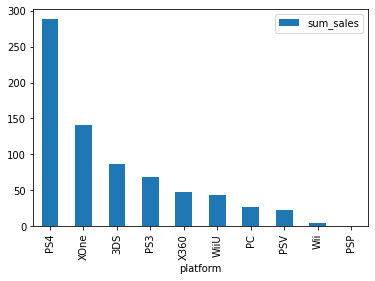

In [28]:
(platform.groupby('platform').sum()
 .sort_values(by='sum_sales', ascending=False)
 .plot(kind='bar'))

Построим распределение по годам трех платформ, с самыми высокими продажами: PS4, XOne и 3DS.

In [29]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='year_of_release'>

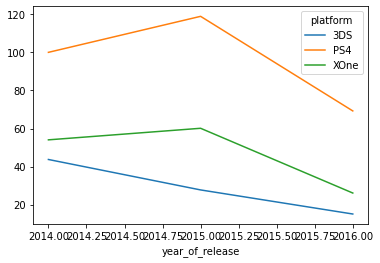

In [30]:
(actual_years
 .query('platform =="PS4" | platform =="XOne" | platform == "3DS"')
 .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
 .plot())


На данном графике видно, что продаж игр на платформе PS4 больше, чем на XOne и 3DS. В 2015 году наблюдается небольшой рост продаж у PS4 и XOne, но так же к 2016 году видно падение. Платформа 3DS без взлетов, просто плавно падает вниз.


Построим ящик с усами по глобальным продажам игр на каждой платформе

<AxesSubplot:>

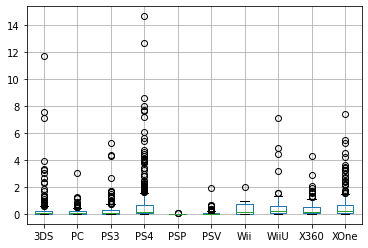

In [31]:
(actual_years
 .pivot_table(index='name', columns='platform', values='sum_sales', aggfunc='sum')
 .boxplot())

На графике большое количество выбросов. Максимальные суммы продаж:

- у 3DS - 12;
- у PC - 3;
- у PS3 - 5;
- у PS4 - 15;
- у PSP - 0;
- у PSV - 2;
- у Wii - 2;
- у WiiU - 7;
- у X360 -4;
- у XOne - 7.

Увеличим масштаб графика, что бы увидеть средние значения

(0.0, 1.6)

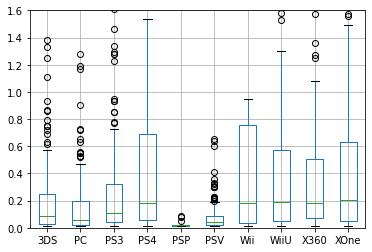

In [32]:
import matplotlib.pyplot as plt
(actual_years
 .pivot_table(index='name', columns='platform', values='sum_sales', aggfunc='sum')
 .boxplot())
plt.ylim(0, 1.6)


На данном графике видно, что на всех платформах медианные значения продаж стремятся к нижней границе. Что говорит о том, что в большая часть продаж состоит из мелких сумм. У платформ  PS4, Wii, WiiU, X360 и XOne медианное значение составляет 0,2. У 3DS, PC и PS3 медианное значение составляет 0,1.

Проверим влияние отзывов критиков и пользователей на общую сумму продаж игр по каждой платформе. Для этого построим диаграмму рассеивания и посчитаем корреляцию. 

In [33]:
filtr_actual_years_cs=actual_years.query('critic_score>=0')#отфильтруем поставленную заглушку

<AxesSubplot:title={'center':'Влияние оценки критиков на продажи игр на платформе 3DS'}, xlabel='sum_sales', ylabel='critic_score'>

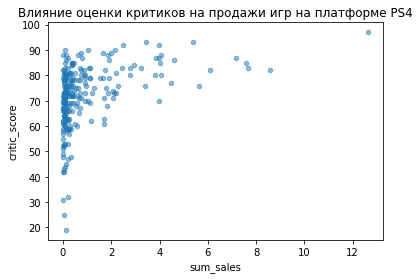

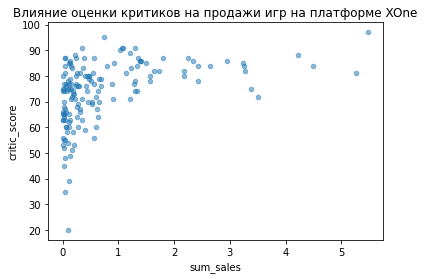

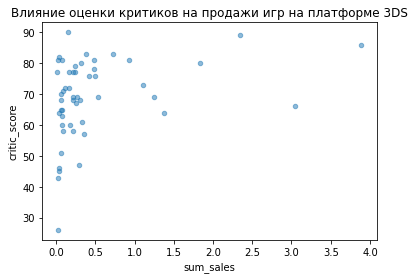

In [34]:
(filtr_actual_years_cs
 .query('platform =="PS4"')
 .plot(x='sum_sales',y='critic_score', kind='scatter', alpha=0.5, title='Влияние оценки критиков на продажи игр на платформе PS4'))
(filtr_actual_years_cs
 .query('platform =="XOne"')
 .plot(x='sum_sales',y='critic_score', kind='scatter', alpha=0.5, title='Влияние оценки критиков на продажи игр на платформе XOne'))
(filtr_actual_years_cs
 .query('platform =="3DS"')
 .plot(x='sum_sales',y='critic_score', kind='scatter', alpha=0.5, title='Влияние оценки критиков на продажи игр на платформе 3DS'))

In [35]:
print('Корреляция между оценкой критиков и продажами на платформе PS4:'
      , filtr_actual_years_cs.query('platform =="PS4"')['sum_sales'].corr(actual_years.query('platform =="PS4"')['critic_score']))
print('Корреляция между оценкой критиков и продажами на платформе XOne:'
      , filtr_actual_years_cs.query('platform =="XOne"')['sum_sales'].corr(actual_years.query('platform =="XOne"')['critic_score']))
print('Корреляция между оценкой критиков и продажами на платформе 3DS:'
      , filtr_actual_years_cs.query('platform =="3DS"')['sum_sales'].corr(actual_years.query('platform =="3DS"')['critic_score']))

Корреляция между оценкой критиков и продажами на платформе PS4: 0.40266141068104083
Корреляция между оценкой критиков и продажами на платформе XOne: 0.42867694370333226
Корреляция между оценкой критиков и продажами на платформе 3DS: 0.31411749286905105


Влияние отзывов критиков на объемы продажи слабое. На графиках видно  рассеянные продажи, при оценке критиков 40 и выше. Основная концентрация продаж игр на платформе PS4 находится на уровне от 0 до 1, при оценке критиков от 60 до 80. На платформе XOne основные продажи от 0 до 1, при оценке критиков 60 до 80. На платформе 3DS при оценке критиков от 60 до 80 есть небольшое скопление единичных продаж. О слабой взаимосвязи говорят и коэффициенты корреляции, которые составили 0,4 для PS4, 0,42 для XOne и 0,31 для 3DS.

In [36]:
filtr_actual_years_us=actual_years.query('user_score>=0') # отфильтруем заглушку

<AxesSubplot:title={'center':'Влияние оценки критиков на продажи игр на платформе 3DS'}, xlabel='sum_sales', ylabel='user_score'>

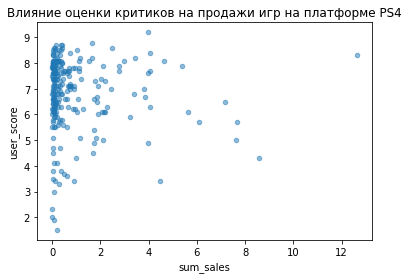

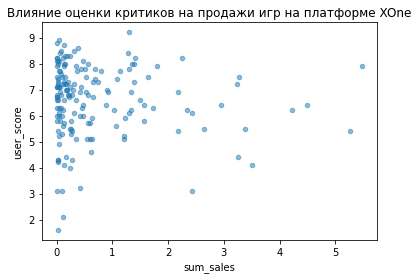

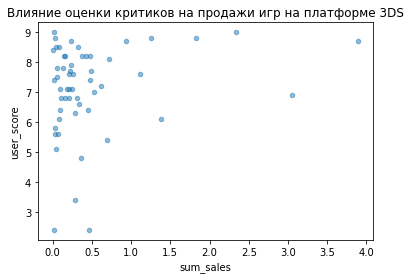

In [37]:
(filtr_actual_years_us
 .query('platform =="PS4"')
 .plot(x='sum_sales',y='user_score', kind='scatter', alpha=0.5, title='Влияние оценки критиков на продажи игр на платформе PS4'))
(filtr_actual_years_us
 .query('platform =="XOne"')
 .plot(x='sum_sales',y='user_score', kind='scatter', alpha=0.5, title='Влияние оценки критиков на продажи игр на платформе XOne'))
(filtr_actual_years_us
 .query('platform =="3DS"')
 .plot(x='sum_sales',y='user_score', kind='scatter', alpha=0.5, title='Влияние оценки критиков на продажи игр на платформе 3DS'))

In [38]:
print('Корреляция между оценкой пользователей и продажами на платформе PS4:'
      , filtr_actual_years_us.query('platform =="PS4"')['sum_sales'].corr(actual_years.query('platform =="PS4"')['user_score']))
print('Корреляция между оценкой пользователей и продажами на платформе XOne:'
      , filtr_actual_years_us.query('platform =="XOne"')['sum_sales'].corr(actual_years.query('platform =="XOne"')['user_score']))
print('Корреляция между оценкой пользователей и продажами на платформе 3DS:'
      , filtr_actual_years_us.query('platform =="3DS"')['sum_sales'].corr(actual_years.query('platform =="3DS"')['user_score']))

Корреляция между оценкой пользователей и продажами на платформе PS4: -0.040131589472697356
Корреляция между оценкой пользователей и продажами на платформе XOne: -0.0703839280647581
Корреляция между оценкой пользователей и продажами на платформе 3DS: 0.2151932718527028


Взаимосвязь между оценкой пользователей и уровнем продаж игр на выбранных платформах практически отсутствует. На всех трех графиках наблюдается присутствие продаж при отсутствии оценок. Помимо этого, на платформе PS4 наблюдается скопление продаж от 0 до 1, при оценке прользователей от 6 до 8. На платформе XOne скопление продаж от 0 до 0,5, при оценке от 6 до 8. На платформе 3DS отсутствует скопление продаж, есть только единичные продажи игр с иценками пользователей свыше 6. 

Присутствует рассеивание продаж независимо от оценки. 
Об отсутствии взаимосвязи говорит так же коэффициент корреляции, который составил -0,04 для PS4,-0,07 для XOne и 0,21 для 3DS.

Посмотрим, как на уровень продаж влияет жанр игры. Построим гистограмму, по которой будет видно, какой жанр продается лучше всего.

In [39]:
# создадим сводную таблицу по жанрам и суммам продаж
genre_sales=actual_years.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
display(genre_sales)

,sum_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


<AxesSubplot:xlabel='genre'>

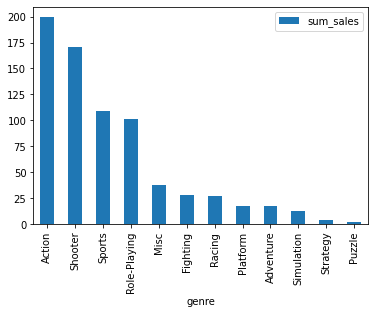

In [40]:
genre_sales.plot(kind='bar')

Самыми продаваемыми жанрами являются Action, Shooter, Sports и Role-Playing. Уровень их продаж превышает 100. Остальные же жанры заметно ниже данного показателя в два раза и больше. Таким образом, можно сказать, что присутствует достаточно сильный разброс между "продаваемыми" и "непродаваемыми" жанрами.

<AxesSubplot:>

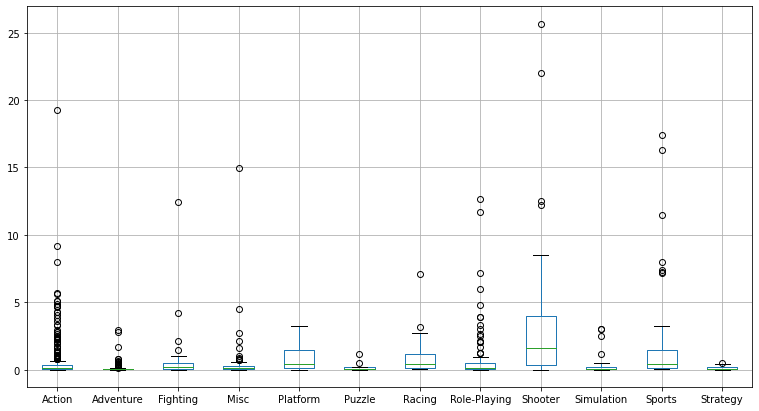

In [41]:
actual_years.pivot_table(index='name',columns='genre', values='sum_sales', aggfunc='sum').boxplot(figsize=(13, 7))

На графике видно, что игры жанров Action, Shooter, Sports и Role-Playing имеют много выбросов в суммах продаж. За счет этого они и являются самыми популярными. 

(0.0, 9.0)

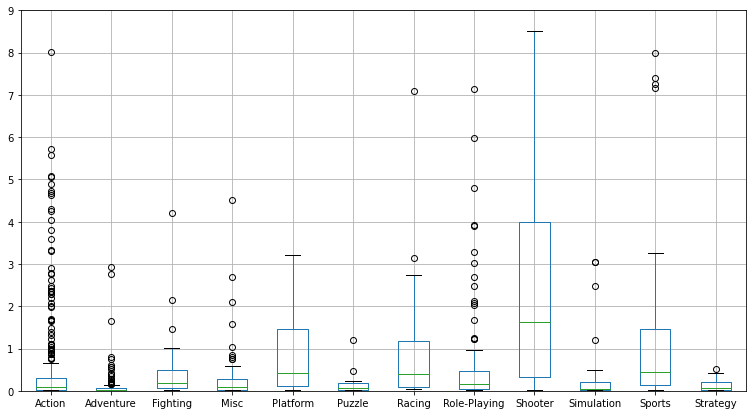

In [42]:
actual_years.pivot_table(index='name',columns='genre', values='sum_sales', aggfunc='sum').boxplot(figsize=(13, 7))
plt.ylim(0,9)

При сравнении медианных значений на диаграме размаха, можно сделать вывод о том, что самым прибыльным является жанр Shooter. Жанр Action же наоборот, несмотря на большое количество продаж, не является прибыльным, из-за того что средняя цена близится к 0.  Наиболее стабильными жанрами являются Shooter, Sports, Platform.

### Промежуточный вывод по исследовательскому анализу данных
На данном этапе изучен объем выпущенных игр за все года. Отобраны для дальнейшей работы данные за 2014,2015 и 2016 года. Данный промежуток взят исходя из того, что поведение пользователей может меняться из года в год и выборка за один год будет не полной. А так же, вся финансовая отчетность составляется за последние три года и информацию а данной работе можно будет сравнить с отчетностью. 
Проанализировано поведение в течении этого срока трех самых популярных платформ: PS4, XOne и 3DS. Продаж игр на платформе PS4 больше, чем на XOne и 3DS. В 2015 году наблюдается небольшой рост продаж у PS4 и XOne, но так же к 2016 году показатели понижаются. Платформа 3DS без взлетов, просто плавно падает вниз. 

При анализе сумм продаж на каждой платформе выявлено большое количество выбросов, которые влияют на общую картину популярности платформ. Если рассматривать средние показатели продаж, большая часть состоит из мелких сумм. У платформ PS4, Wii, WiiU, X360 и XOne медианное значение составляет 0,2. У 3DS, PC и PS3 медианное значение составляет 0,1.
Так же проанализирована взаимосвзять оценки критиков и пользователей, с продажей игр на каждой платформе. Установлено, что взаимосвязь практически отсутствует. Об этом же говорят коэффициенты кореляции - они не достигают значеия 0,3.
Проанализировано распределение продаж по жанрам игр. Самыми популярными жанрами являются Action, Shooter, Sports и Role-Playing. Но, при сравнении цен на диаграме размаха, можно сделать вывод о том, что самым прибыльным является жанр Shooter. Жанр Action же наоборот, несмотря на большое количество продаж, не является прибыльным, из-за того что средняя цена близится к 0.  Наиболее стабильными жанрами являются Shooter, Sports, Platform.

## Портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Определим для каждого региона самые популярные платформы. Для этого сначала составим общую гистограмму по всем регионам и платформам. Затем разберем отдельно каждый регион.

In [43]:
print(actual_years.columns) #для удобства выведем наименования колонок таблицы

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'sum_sales'],
      dtype='object')


<AxesSubplot:xlabel='platform'>

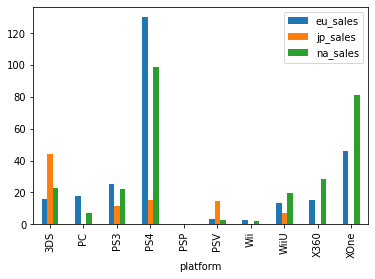

In [44]:
actual_years.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').plot(kind='bar')

Расшифровка:
- eu_sales - Европа
- jp_sales - Япония
- na_sales - Америка

На графике видно, что лидирует по продажам платформа PS4 в Европе и в Америке. Так же в Америке пользуются спросом игры на платформе XOne, но уже чуть меньше. В Японии пользователи играют в основном на платформе 3DS. 

Для определения пяти самых популярных платформ в каждом регионе, построим гистограммы.

<AxesSubplot:title={'center':'Топ-5 платформ в Америке'}, ylabel='na_sales'>

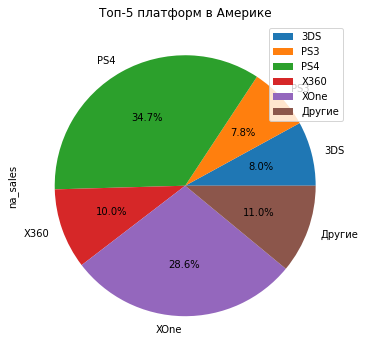

In [45]:
na=actual_years.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_top=na[:5]
na['group']=na.index.where(na.index.isin(na_top.index), 'Другие')
na_group=na.pivot_table(index='group', values='na_sales', aggfunc=['sum'])
na_group.plot(y='sum', kind='pie', figsize=(6,6), title='Топ-5 платформ в Америке', autopct='%.1f%%')

Как видно на графике,по сумме продаж игр в Америке лидирует платформа PS4, доля продаж составляет 37,7%. Чуть менее прибыльной является платформа XOne, доля ее продаж составляет 28,6%. Далее идут X360 - 10%, 3DS - 8% и PS3 - 7,8%. Доля продаж игр на всех остальных платформах составила 11%.

<AxesSubplot:title={'center':'Топ-5 платформ в Европе'}, ylabel='доля'>

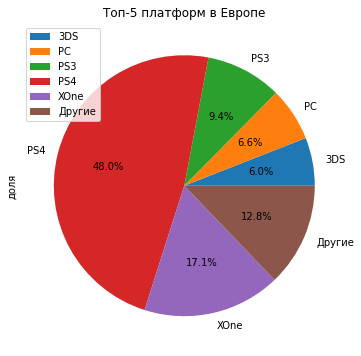

In [46]:
eu=actual_years.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_top=eu[:5]
eu['group']=eu.index.where(eu.index.isin(eu_top.index), 'Другие')
eu_group=eu.pivot_table(index='group', values='eu_sales', aggfunc='sum')
eu_group.columns=['доля']
eu_group.plot(y='доля', kind='pie', figsize=(6,6), title='Топ-5 платформ в Европе', autopct='%.1f%%')


В Европе как и в Америке лидирует платформа PS4. Доля ее продаж составила 48%. Менее популярной является XOne, с долей продаж 17,1%. Далее идут PS3 - 9,4%, PC- 6,6%, 3DS - 6%. Доля продаж игр на всех остальных платформах составила 12,8%.

<AxesSubplot:title={'center':'Топ-5 платформ в Японии'}, ylabel='доля'>

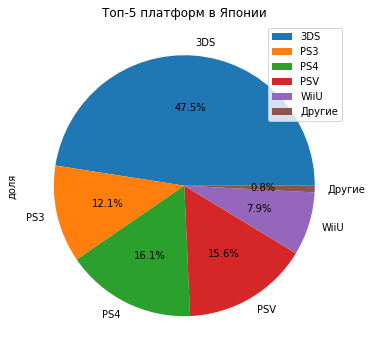

In [47]:
jp=actual_years.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_top=jp[:5]
jp['group']=jp.index.where(jp.index.isin(jp_top.index), 'Другие')
jp_group=jp.pivot_table(index='group', values='jp_sales', aggfunc='sum')
jp_group.columns=['доля']
jp_group.plot(y='доля', kind='pie', figsize=(6,6), title='Топ-5 платформ в Японии', autopct='%.1f%%')

В Японии лидирующую позицию по продажам занимает платформа 3DS, доля продаж составляет 47,5%. Далее следуют PS4 - 16,1%, PSV - 15,6%, PS3 - 12,1% и WiiU - 7,9%. Остальные же платформы в Японии можно сказать не пользуются спросом, так как доля продаж игр на все остальные платформы составила всего 0,8%.

Топ-5 платформ в Америке составляет: PS4, XOne, X360, 3DS и PS3.

Топ-5 платформ в Европе составляет: PS4, XOne, PS3, PC, 3DS.

Топ-5 платформ в Японии составляет: 3DS, PS4, PSV, PS3 и WiiU.

Обобщая выводы, можно сказать, что платформа PS4 лидирует в Америке и в Европе. В Японии же  самую большую долю продаж занимает платформа 3DS, а PS4 занимает 2 место. В Америке и Европе так же пользуются спросом платформа XOne, чего нет в Японии. 

<AxesSubplot:xlabel='genre'>

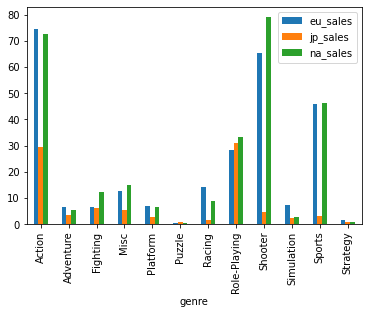

In [48]:
actual_years.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').plot(kind='bar')

Как видно на графике, самыми популярными жанрами в Америке и Европе являются Shooter (в Европе популярность чуть меньше), Action, Sports и Role-Playing. В Японии же лидируют с большим отрывом 2 жанра: Action и Playing. 

Для более детального анализа жанров по регионам, построим гистограммы.

<AxesSubplot:title={'center':'Топ-5 жанров в Америке'}, ylabel='na_sales'>

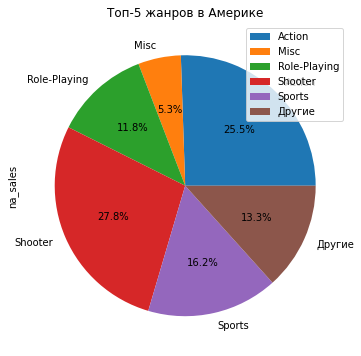

In [49]:
na=actual_years.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_top=na[:5]
na['group']=na.index.where(na.index.isin(na_top.index), 'Другие')
na_group=na.pivot_table(index='group', values='na_sales', aggfunc=['sum'])
na_group.plot(y='sum', kind='pie', figsize=(6,6), title='Топ-5 жанров в Америке', autopct='%.1f%%')

В Америке лидирует жанр Shooter с долей продаж 27.8%. Немного меньше доля продаж у жанра Action, которая составила 25,5%. Доля Sports составила 16,2%, доля Role-Playing составила 11,8%, Misc-5,3%. Доля продаж других жанров составила 13,3%.

<AxesSubplot:title={'center':'Топ-5 жанров в Европе'}, ylabel='доля'>

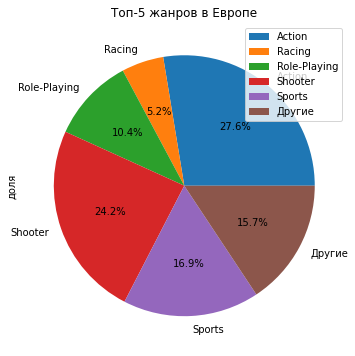

In [50]:
eu=actual_years.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_top=eu[:5]
eu['group']=eu.index.where(eu.index.isin(eu_top.index), 'Другие')
eu_group=eu.pivot_table(index='group', values='eu_sales', aggfunc='sum')
eu_group.columns=['доля']
eu_group.plot(y='доля', kind='pie', figsize=(6,6), title='Топ-5 жанров в Европе', autopct='%.1f%%')

Самую большую долю жанров в Европе имеет Action, 27,6%. Чуть менее популярным является жанр Shooter, его доля составляет 24,2%. Доля продаж Sports - 16,9%, доля продаж Role-Playing - 10,4%, доля продаж Racing - 5,2%.  Все остальные платформы имеют долю 15,7%. 

<AxesSubplot:title={'center':'Топ-5 жанров в Японии'}, ylabel='доля'>

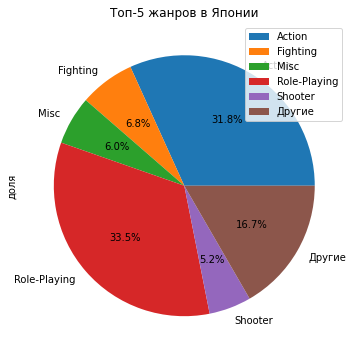

In [51]:
jp=actual_years.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_top=jp[:5]
jp['group']=jp.index.where(jp.index.isin(jp_top.index), 'Другие')
jp_group=jp.pivot_table(index='group', values='jp_sales', aggfunc='sum')
jp_group.columns=['доля']
jp_group.plot(y='доля', kind='pie', figsize=(6,6), title='Топ-5 жанров в Японии', autopct='%.1f%%')

В Японии самую большую долю продаж занимает жанр Role-Playing - 33,5%. Чуть меньше, 31,8% занимает Action. Жанры Fighting, Misc, Shooter имеют доли 6,8%, 6%, 5,2% соответственно.  Доля всех остальных жанров составляет 16.7%.

Топ-5 жанров в Америке составляет: Shooter, Action, Sports, Role-Playing, Misc.

Топ-5 жанров в Европе составляет: Action, Shooter, Sports, Role-Playing, Racing. 

Топ-5 жанров в Японии составляет: Role-Playing, Action, Fighting, Misc, Shooter. 

Обобщая проведенный анализ о продажах определенных жанров,  можно сделать вывод, что жанры Action, Shooter являются самыми популярными в Америке и Европе. В Японии самые продаваемые жанры это Role-Playing и Action

Проведем исследование, как на продажи игр влияет рейтинг ESRB

In [52]:
import warnings #импортируем библиотеку

warnings.filterwarnings('ignore') # отключаем предупреждения

# посставим заглушку "-1" на пропуски в стоблце rating
actual_years['rating']=actual_years['rating'].fillna('-1')

<AxesSubplot:xlabel='rating'>

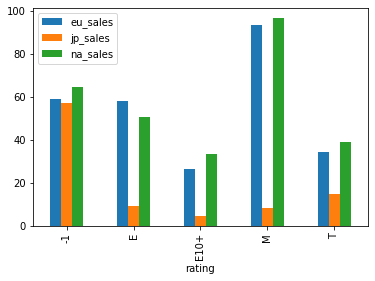

In [53]:
actual_years.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').plot(kind='bar')#сводная таблица по продажам в Америке

In [54]:
# проверим заглушку
actual_years['rating'].value_counts()

-1      749
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

Расшифровка:
 - E - подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA. 
 - E10+ - подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
 - M - подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.
 - T - подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.

<AxesSubplot:title={'center':'Рейтинг ESRB игр в Америке'}, ylabel='na_sales'>

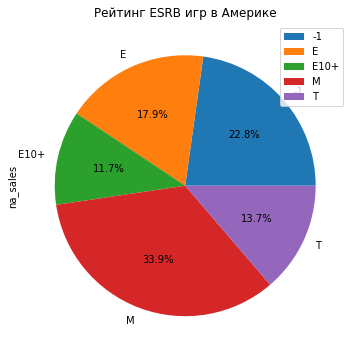

In [55]:
rating_na=actual_years.pivot_table(index='rating', values='na_sales', aggfunc='sum')

rating_na.plot(y='na_sales', kind='pie', figsize=(6,6), title='Рейтинг ESRB игр в Америке', autopct='%.1f%%')

Большая часть игр в Америке имеют рейтинг M, доля продаж игр данного рейтинга составляет 33,9%. Доля продаж игр рейтинга E составляет 17,9%. Т - 13,7%, Е10+ - 11,7%. Не малую долю, 22,8% занимают игры европеских стран.

<AxesSubplot:title={'center':'Рейтинг ESRB игр в Европе'}, ylabel='eu_sales'>

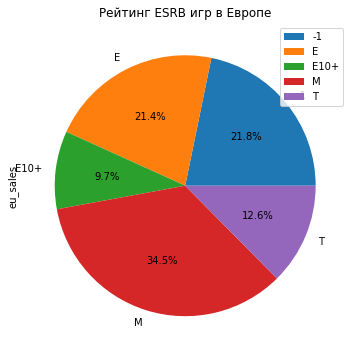

In [56]:
rating_eu=actual_years.pivot_table(index='rating', values='eu_sales', aggfunc='sum')

rating_eu.plot(y='eu_sales', kind='pie', figsize=(6,6), title='Рейтинг ESRB игр в Европе', autopct='%.1f%%')

В Европе популярностью пользуются игры с рейтингом М - 34,5%. Доля продаж игр с ретингом Е составляет 21,4%, рейтинг Т - 12,6%, Е10+ - 9,7%. Так же как и в Америке, достаточно большую долю продаж имеют игры других стран, что составляют 21,8%.

<AxesSubplot:title={'center':'Рейтинг ESRB игр в Японии'}, ylabel='jp_sales'>

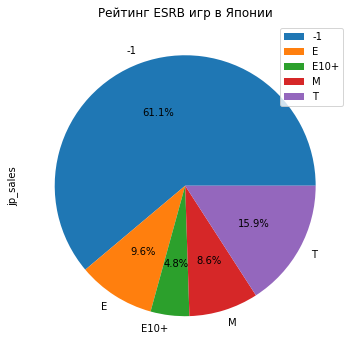

In [57]:
rating_jp=actual_years.pivot_table(index='rating', values='jp_sales', aggfunc='sum')

rating_jp.plot(y='jp_sales', kind='pie', figsize=(6,6), title='Рейтинг ESRB игр в Японии', autopct='%.1f%%')

В Японии львиную долю продаж занимают игры не входящие в рейтинг ESRB, соответственно они имеют другие обозначения возрастных ограничений. Доля таких игр занимает 61,1%. Доли продаж игр с маркоровкой США и Канады следующие:

- Т - 15,9%;
- Е - 9,6%;
- М - 8,6%;
- Е10+ - 4,8%.

Обобщая проведенное исследование по влиянию рейтинга на продажи, можно сделать вывод о том, что в Америке и Европе пользуются большим спросом игры с рейтингом M (для лиц старше 17 лет).Так же пользуются спросом и игры с рейтингами других стран, 21-22%. Наименьшим спросом пользуются игры с рейтингом Е10+(для лиц старше 10 лет). В Японии же самую большую долю продаж занимают игры с маркировкой не входящей в перечень ESRB, 61.1%. Самыми не популярными играми являются так же игры с рейтингом E10+.

### Промежуточный вывод по портрету пользователя каждого региона
Самой продаваемой платформой в Европе и Америке является PS4. В Японии же самую большую долю продаж занимает платформа 3DS, а PS4 занимает 2 место.

Жанры Action, Shooter являются самыми популярными в Америке и Европе. В Японии самые продаваемые жанры это Role-Playing и Action.

По имеющимся данным о рейтингах игр, можно сделать вывод о том, что в Америке и Европе популярны игры с рейтингом M (для лиц старше 17 лет).  В Японии же самую большую долю продаж занимают игры с маркировкой не входящей в перечень ESRB и составляют 61.1%. Самыми не популярными играми являются игры с рейтингом E10+(для лиц старше 10 лет). Наименьшим спросом пользуются игры с рейтингом Е10+.

## Проверим гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
<p>Задайте самостоятельно пороговое значение alpha.<br>
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Проверим две гипотезы:
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

1.

H0-cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1-cредние пользовательские рейтинги платформ Xbox One и PC разные

In [58]:
xone_score=filtr_actual_years_us.loc[filtr_actual_years_us['platform']=='XOne','user_score']
xone_score=xone_score.dropna()
pc_score=filtr_actual_years_us.loc[filtr_actual_years_us['platform']=='PC','user_score']
pc_score=pc_score.dropna()
print('величина выборки по жанру XOne:', len(xone_score)) # для определения критического уровня значимости проверим величину выборки
print('величина выборки по жанру PC:', len(pc_score))

величина выборки по жанру XOne: 165
величина выборки по жанру PC: 122


In [59]:
from scipy import stats as st

In [60]:
alpha = 0.01# критический уровень статистической значимости

results = st.ttest_ind(
    xone_score,
    pc_score,
    equal_var = False)# проверим гипотезу о равенстве средних двух независимых совокупностей с помощью ttest

print('p-значение:', results.pvalue)

if (results.pvalue<alpha):# ваш код: сравните получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


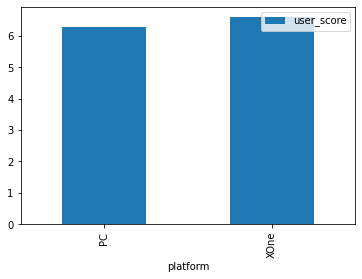

In [61]:
xone_pc=(filtr_actual_years_us.query('platform =="XOne" | platform =="PC"')
              .pivot_table(index='platform', values='user_score', aggfunc='mean')
              .plot(kind='bar'))
plt.show()

По графику видно, что средние пользовательские рейтинги примерно одинаковые

Так как величина выборок превышает 100 пунктов, и они не являются одинаковыми, критический уровень значимости целесообразнее установить 0,01.

2.

H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1 - Средние пользовательские рейтинги жанров Action и Sports разные

In [62]:
action_score=filtr_actual_years_us.loc[filtr_actual_years_us['genre']=='Action','user_score']
action_score=action_score.dropna()
sports_score=filtr_actual_years_us.loc[filtr_actual_years_us['genre']=='Sports','user_score']
sports_score=sports_score.dropna()
print('величина выборки по жанру Action:', len(action_score)) # для определения критического уровня значимости проверим величину выборки
print('величина выборки по жанру Sports:', len(sports_score))

величина выборки по жанру Action: 297
величина выборки по жанру Sports: 127


In [63]:
alpha = 0.01# так как размер выборки превышает 100, установим уровень значимости 0,01

results = st.ttest_ind(
    action_score,
    sports_score,
    equal_var = False)# проверим гипотезу о равенстве средних двух независимых совокупностей с помощью ttest

print('p-значение:', results.pvalue)

if (results.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


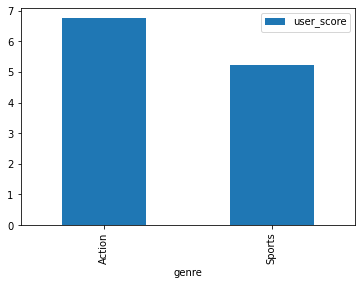

In [64]:
action_sports=(filtr_actual_years_us.query('genre =="Action" | genre =="Sports"')
              .pivot_table(index='genre', values='user_score', aggfunc='mean')
              .plot(kind='bar'))
plt.show()

Так как величина выборок превышает 100 пунктов, и они не являются одинаковыми, критический уровень значимости целесообразнее установить 0,01.

### Промежуточный вывод по проверке гипотез
На основании имеющихся данных, при уровне занчимости 1% мы принимаем гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
На основании имеющихся данных, при уровне занчимости 1% мы отвергаем гипотезу "Средние пользовательские рейтинги жанров Action и Sports одинаковые" в пользу альтернативной "Средние пользовательские рейтинги жанров Action и Sports разные"

# Общий вывод
На этапе предъобработки данных были проведены следующие мероприятия:
 - замена названий столбцов на нижний регистр;
 - заменены пропуски в столбце year_of_release на 0;
 - удалены строки с пропусками в стоблцах name и genre;
 - заменены пропуски в стоблцах critic_score и user_score, так же в столбце user_score значения tbd заменены 0;
 - создана дополнительная колонка с общей суммой продаж каждой игры во всех регионах.
 
Из полученных данных были отобраны 2014,2015 и 2016 года. Данный промежуток обоснован тем, что поведение пользователей меняется из года в год и меньшей выборки не достаточно. А так же, вся финансовая отчетность составляется за последние три года и информацию в данной работе можно будет сравнить с отчетностью. 
 
 За выбранный период времени выявлено три самые популярные платформы: PS4, XOne и 3DS. По количеству покупок игр лидирует PS4. В 2015 году наблюдается небольшой рост продаж у PS4 и XOne, но потом ближе к 2016 году продажи снижаются ниже уровня 2014 года. Продажи игр на платформе 3DS с 2014 года снижаются. 

При анализе средних показателей сумм продаж было установлено, что большая часть состоит из мелких сумм. У платформ PS4, Wii, WiiU, X360 и XOne медианное значение составляет 0,2. У 3DS, PC и PS3 медианное значение составляет 0,1. Наиболее стабильными платформами являются PS4, XOne, Wii

Так же проанализирована взаимосвзять оценки критиков и пользователей, с продажей игр на каждой платформе. Установлено, оценка критиков слабо влияет на продажи, а оценка пользователей не влияет вовсе.
При построении диаграммы размаха по суммам продаж и жанрам,был сделан вывод, что самым прибыльным является жанр Shooter. Жанр Action же наоборот, несмотря на большое количество продаж, не является прибыльным, из-за того что средняя цена близится к 0.  Наиболее стабильными жанрами являются Shooter, Sports, Platform.
 
 При исследовании продаж игр на различных платформах в каждом регионе было выявлено: 
 - Топ-5 платформ в Америке составляет: PS4, XOne, X360, 3DS и PS3.
 - Топ-5 платформ в Европе составляет: PS4, XOne, PS3, PC, 3DS.
 - Топ-5 платформ в Японии составляет: 3DS, PS4, PSV, PS3 и WiiU.

Платформа PS4 лидирует в Америке и в Европе. В Японии же самую большую долю продаж занимает платформа 3DS, а PS4 занимает 2 место. В Америке и Европе так же пользуются спросом платформа XOne, чего нет в Японии.

При исследовании продаж игр различных жанров в каждом регионе было выявлено: 
- Топ-5 жанров в Америке составляет: Shooter, Action, Sports, Role-Playing, Misc.
- Топ-5 жанров в Европе составляет: Action, Shooter, Sports, Role-Playing, Racing. 
- Топ-5 жанров в Японии составляет: Role-Playing, Action, Fighting, Misc, Shooter. 

Жанры Action, Shooter являются самыми популярными в Америке и Европе. В Японии самые продаваемые жанры это Role-Playing и Action

При исследовании продаж игр в зависимости от рейтинга ESRB в каждом регионе было выявлено, что в Америке и Европе пользуются большим спросом игры с рейтингом M (для лиц старше 17 лет).Так же пользуются спросом и игры с рейтингами других стран, 21-22%. Наименьшим спросом пользуются игры с рейтингом Е10+(для лиц старше 10 лет). В Японии же самую большую долю продаж занимают игры с маркировкой не входящей в перечень ESRB, 61.1%. Самыми не популярными играми являются так же игры с рейтингом E10+.
Для полноценного анализа влияние возрастных ограничений на продажи игр, необходимо добавить информацию с рейтингами других стран.
 
 Так же были проверены две гипотезы:
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action и Sports разные.
 На основании имеющихся данных, при уровне занчимости 1% мы принимаем гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". На основании имеющихся данных, при уровне занчимости 1% мы отвергаем гипотезу "Средние пользовательские рейтинги жанров Action и Sports одинаковые" в пользу альтернативной "Средние пользовательские рейтинги жанров Action и Sports разные"
 
**При планировании рекламной кампании на 2017 год исходя из вышеизложенной информации: 
 Игры в жанрах Shooter, Action на платформах PS4 и XOne, для лиц старше 17 лет, выгоднее рекламировать в Америке и Европе. Для запуска рекламной кампании в Японии недостаточно данных по возрастным ограничениям.**
 